Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8490 - loss: 0.4714 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9743 - loss: 0.0851 - val_accuracy: 0.9863 - val_loss: 0.0461
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9824 - loss: 0.0596 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9863 - loss: 0.0434 - val_accuracy: 0.9879 - val_loss: 0.0421
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 0.9914 - val_loss: 0.0292
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9901 - loss: 0.0322
Test Accuracy: 0.9919000267982483
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
Predicted Class: 7


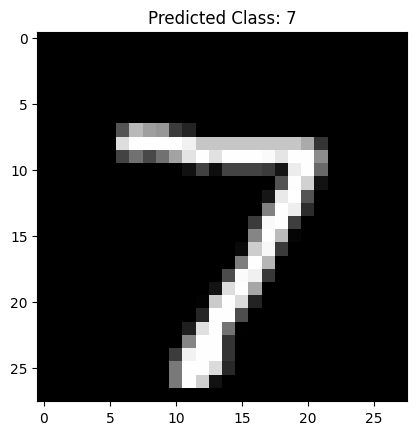

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Predict for single image
import numpy as np
sample_image = x_test[0].reshape(1, 28, 28, 1)
predicted_class = np.argmax(model.predict(sample_image))
print(f"Predicted Class: {predicted_class}")

# Visualize
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()